<H1>Bank Marketing Data:</H1>
<H4>Customer will opt for service or not </H4>



In [52]:
#Importing data in dataframe
import pandas as pd
# df = pd.read_csv('bank-full.csv', delimiter=',')
df = pd.read_csv('bank-full.csv')
print(df)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

In [53]:
list_of_column_names = list(df.columns)

In [54]:
#Identifying Null Data
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<H5>Data visualization</H5>

In [55]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [56]:
no_sub = len(df[df['y']=='no'])
sub = len(df[df['y']=='yes'])
pct_no_sub = no_sub/(no_sub+sub)
print("Percentage of no subscription is", round(pct_no_sub*100))
pct_sub = sub/(no_sub+sub)
print("Percentage of subscription", round(pct_sub*100))

Percentage of no subscription is 88
Percentage of subscription 12


In [57]:
df.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,
admin.,39.289886,1135.838909,15.564301,246.896732,2.575324,47.859021,0.671630
blue-collar,40.044081,1078.826654,15.442561,262.901562,2.816995,44.033498,0.505138
entrepreneur,42.190989,1521.470074,15.702085,256.309348,2.799597,32.486214,0.478144
housemaid,46.415323,1392.395161,16.002419,245.825000,2.820968,21.505645,0.371774
management,40.449567,1763.616832,16.114189,253.995771,2.864348,38.665468,0.668006
retired,61.626767,1984.215106,15.439488,287.361307,2.346731,37.443905,0.638693
self-employed,40.484484,1647.970868,16.027866,268.157061,2.853072,34.747308,0.551615
services,38.740250,997.088108,15.635532,259.318729,2.718344,41.995185,0.501204
student,26.542644,1388.060768,14.897655,246.656716,2.299574,57.041578,0.953092


Text(0, 0.5, 'Frequency of Opting')

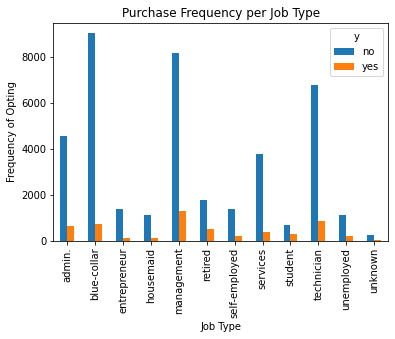

In [58]:
#Purchase Frequency by Job
%matplotlib inline
pd.crosstab(df.job,df.y).plot(kind='bar')
plt.title('Purchase Frequency per Job Type')
plt.xlabel('Job Type')
plt.ylabel('Frequency of Opting')


Text(0, 0.5, 'Frequency of Opting')

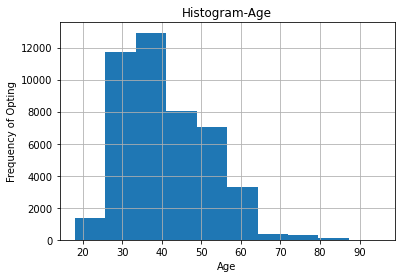

In [28]:
#Age histogram
df.age.hist()
plt.title('Histogram-Age')
plt.xlabel('Age')
plt.ylabel('Frequency of Opting')

Text(0, 0.5, 'Frequency of Opting')

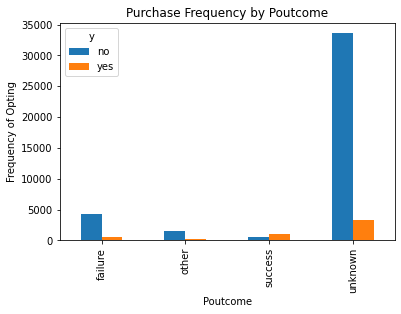

In [29]:
#Opting Frequency by previous opt
pd.crosstab(df.poutcome,df.y).plot(kind='bar')
plt.title('Purchase Frequency by Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Opting')

In [59]:
list_of_column_names
df1 =df.copy()

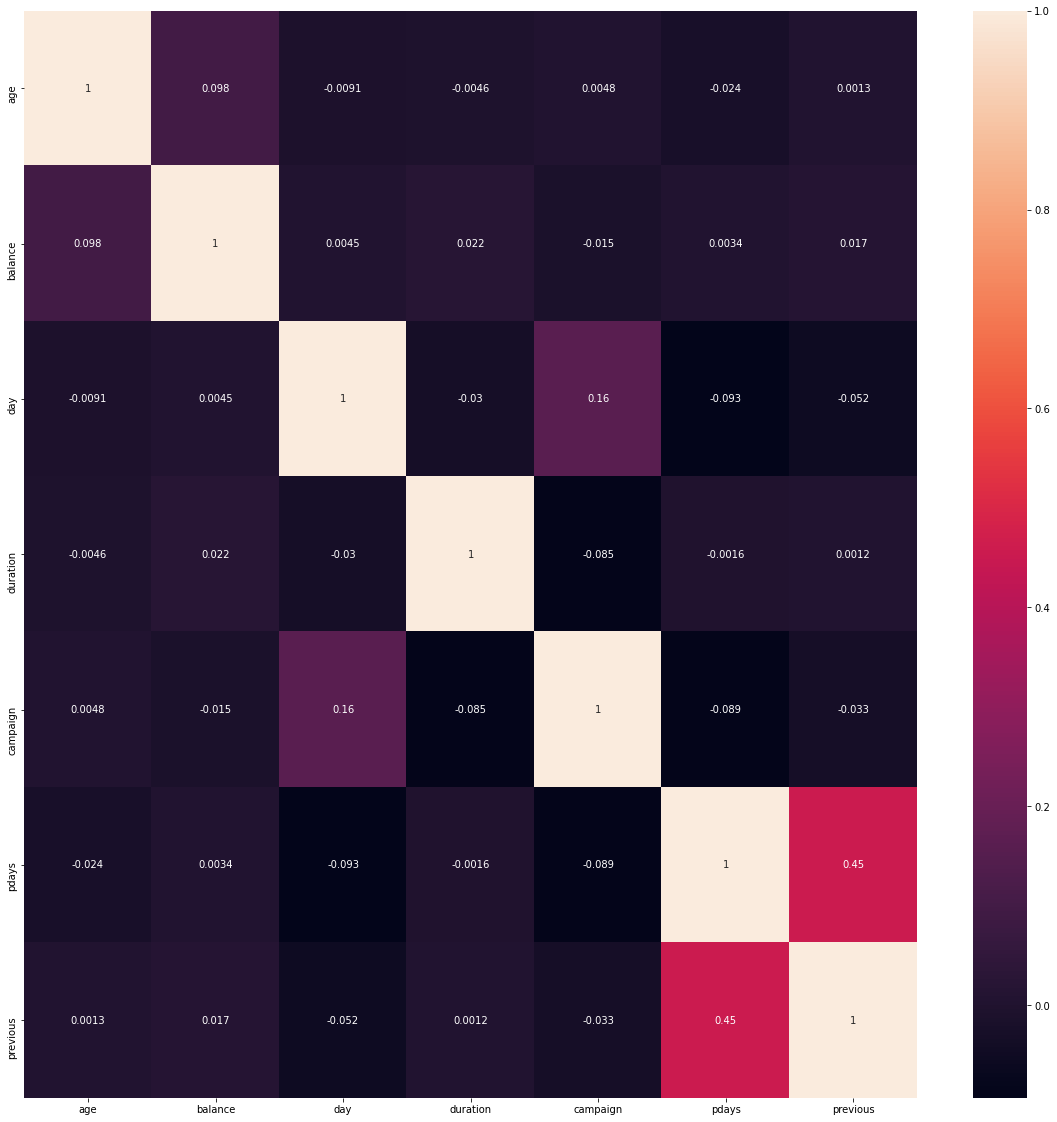

In [11]:
import seaborn as sns
corrMatrix = df1.corr()
sns.heatmap(corrMatrix, annot=True)
plt.rcParams["figure.figsize"] = (15,10)
plt.show()

In [60]:
#Encoding string variables 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# ['marital','education','default','housing','poutcome','y','loan']
# df1['marital']= le.fit_transform(df1['marital'])
# df1['education']= le.fit_transform(df1['education'])
df1['poutcome']= le.fit_transform(df1['poutcome'])
df1['default']= le.fit_transform(df1['default'])
df1['housing']= le.fit_transform(df1['housing'])
df1['y']= le.fit_transform(df1['y'])
df1['loan']= le.fit_transform(df1['loan'])


In [61]:
#Creating dummy variables for variables with less types
df1= pd.get_dummies(df1, columns=["marital"])
df1= pd.get_dummies(df1, columns=["education"])

In [62]:
df1

,age,job,default,balance,housing,loan,contact,day,month,duration,...,previous,poutcome,y,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,58,management,0,2143,1,0,unknown,5,may,261,...,0,3,0,0,1,0,0,0,1,0
1,44,technician,0,29,1,0,unknown,5,may,151,...,0,3,0,0,0,1,0,1,0,0
2,33,entrepreneur,0,2,1,1,unknown,5,may,76,...,0,3,0,0,1,0,0,1,0,0
3,47,blue-collar,0,1506,1,0,unknown,5,may,92,...,0,3,0,0,1,0,0,0,0,1
4,33,unknown,0,1,0,0,unknown,5,may,198,...,0,3,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,0,825,0,0,cellular,17,nov,977,...,0,3,1,0,1,0,0,0,1,0
45207,71,retired,0,1729,0,0,cellular,17,nov,456,...,0,3,1,1,0,0,1,0,0,0
45208,72,retired,0,5715,0,0,cellular,17,nov,1127,...,3,2,1,0,1,0,0,1,0,0
45209,57,blue-collar,0,668,0,0,telephone,17,nov,508,...,0,3,0,0,1,0,0,1,0,0


In [63]:
#Dropping columns as these will be sueful only in realtime analysis 
df1.drop(['balance','contact','day','month','duration'], axis = 1, inplace = True)
df1

,age,job,default,housing,loan,campaign,pdays,previous,poutcome,y,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,58,management,0,1,0,1,-1,0,3,0,0,1,0,0,0,1,0
1,44,technician,0,1,0,1,-1,0,3,0,0,0,1,0,1,0,0
2,33,entrepreneur,0,1,1,1,-1,0,3,0,0,1,0,0,1,0,0
3,47,blue-collar,0,1,0,1,-1,0,3,0,0,1,0,0,0,0,1
4,33,unknown,0,0,0,1,-1,0,3,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,0,0,0,3,-1,0,3,1,0,1,0,0,0,1,0
45207,71,retired,0,0,0,2,-1,0,3,1,1,0,0,1,0,0,0
45208,72,retired,0,0,0,5,184,3,2,1,0,1,0,0,1,0,0
45209,57,blue-collar,0,0,0,4,-1,0,3,0,0,1,0,0,1,0,0


In [64]:
#Binning job types on general income class 
job_dict = {
    'management': '4', 'entrepreneur': '4', 
    'services': '4', 'self-employed': '3', 
    'retired': '3', 'admin.': '3', 
    'technician': '2', 'blue-collar': '2',
    'housemaid': '2', 'unknown': '1',
    'unemployed': '1', 'student': '1'
}

df1=df1.assign(Groups=df1.job.map(job_dict)).fillna('Other')


In [65]:
df1.rename(columns = {'Groups': 'Job_Income_Group'}, inplace = True)
df1['Job_Income_Group'] = df1['Job_Income_Group'].astype(int)
df1

,age,job,default,housing,loan,campaign,pdays,previous,poutcome,y,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,Job_Income_Group
0,58,management,0,1,0,1,-1,0,3,0,0,1,0,0,0,1,0,4
1,44,technician,0,1,0,1,-1,0,3,0,0,0,1,0,1,0,0,2
2,33,entrepreneur,0,1,1,1,-1,0,3,0,0,1,0,0,1,0,0,4
3,47,blue-collar,0,1,0,1,-1,0,3,0,0,1,0,0,0,0,1,2
4,33,unknown,0,0,0,1,-1,0,3,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,0,0,0,3,-1,0,3,1,0,1,0,0,0,1,0,2
45207,71,retired,0,0,0,2,-1,0,3,1,1,0,0,1,0,0,0,3
45208,72,retired,0,0,0,5,184,3,2,1,0,1,0,0,1,0,0,3
45209,57,blue-collar,0,0,0,4,-1,0,3,0,0,1,0,0,1,0,0,2


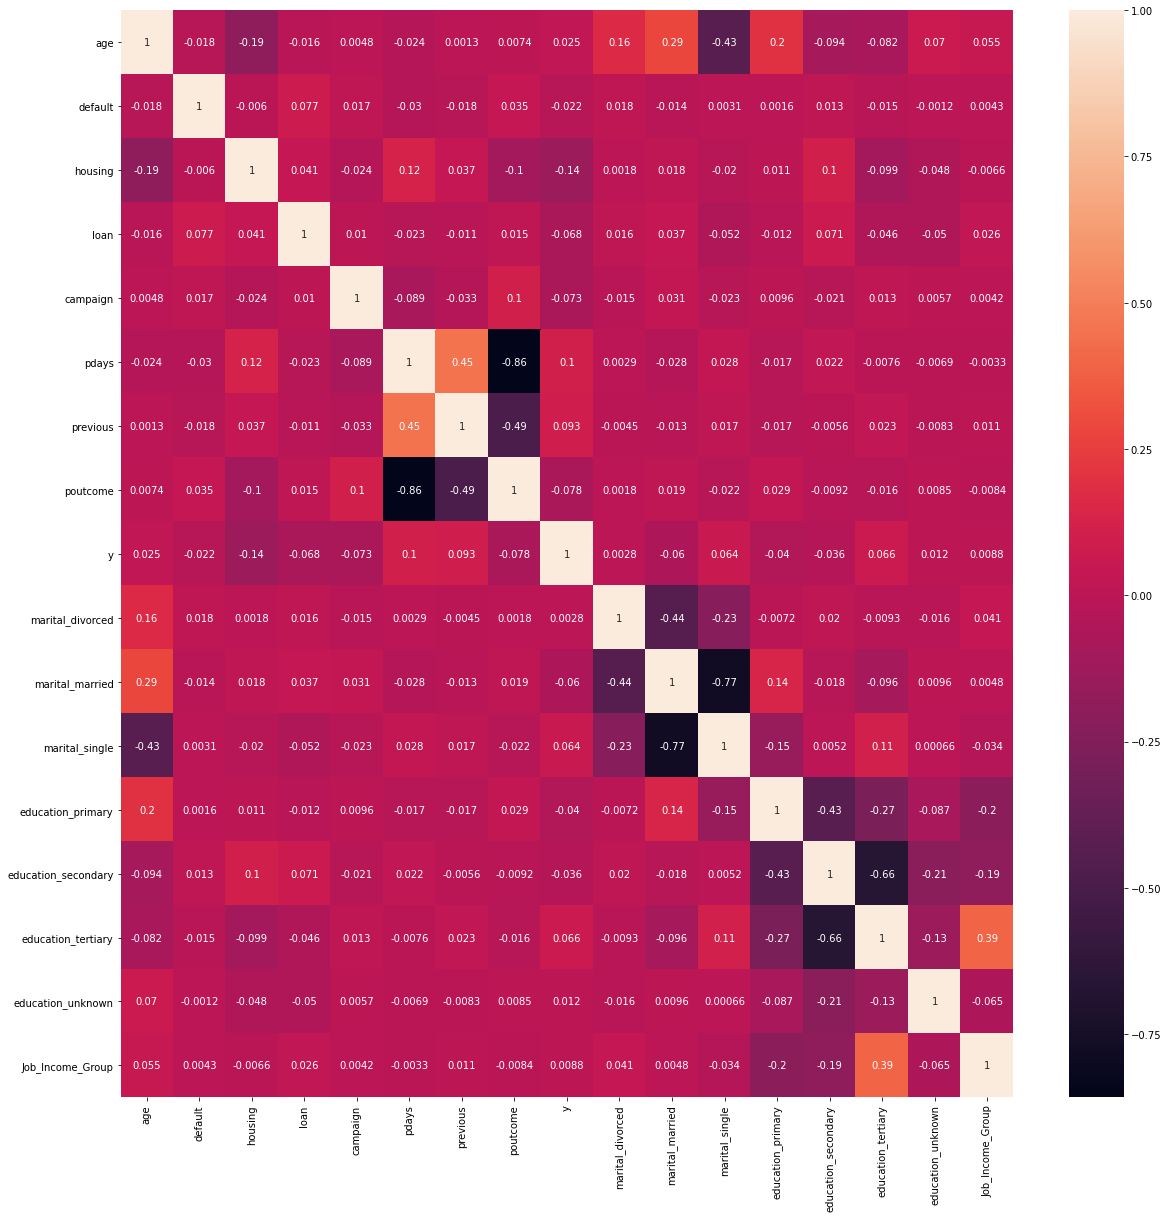

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
corrMatrix = df1.corr()
sns.heatmap(corrMatrix, annot=True)
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

<H4>Implementing Model</H4>
<H5>Decision tree</H5>

In [78]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [79]:
imp_cols = ['age','Job_Income_Group', 'default','housing','loan','campaign','pdays','previous','marital_divorced','marital_married','marital_single','education_primary','education_secondary','education_tertiary','education_unknown']
X = df1[imp_cols] # Features
y = df1.y # Target variable

In [80]:
X_train, X_test, y_train, y_test_DT = train_test_split(X, y, test_size=0.3, random_state=7)

In [81]:
df_dc = DecisionTreeClassifier()

# Train Decision Tree Classifer
df_dc = df_dc.fit(X_train,y_train)

#Predicting the response for test dataset
y_pred_DT = df_dc.predict(X_test)

<H5>Evaluation of Decision tree classifier- Accuracy and Jaccard Score</H5>

In [82]:
print("Accuracy of Decision Tree Classifier:",metrics.accuracy_score(y_test_DT, y_pred_DT))

Accuracy of Decision Tree Classifier: 0.8498967856089649


In [83]:
from sklearn.metrics import jaccard_score
print("Jaccard Score of Decision Tree Classifier:",jaccard_score(y_test_DT, y_pred_DT,pos_label = 0))

Jaccard Score of Decision Tree Classifier: 0.846432342736461


<H5>XGBOOST Model</H5>

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [85]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

c:\users\aniruddha\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:07:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [86]:
y_pred = model.predict(X_test)

c:\users\aniruddha\appdata\local\programs\python\python39\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


<H5>XGBoost evaluation- Accuracy, Confusion Matrix and F1</H5>

In [87]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8882335594219994


In [31]:
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,11806,200,12006
1,1316,242,1558
All,13122,442,13564


In [32]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  11806
False Positives:  200
False Negatives:  1316
True Positives:  242


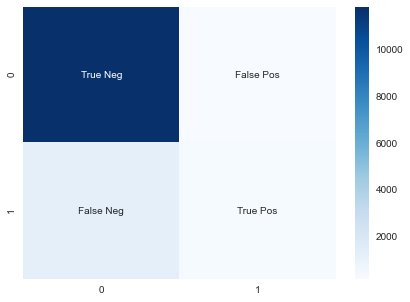

In [125]:
data = [[tn, fp],[fn, tp]]
plt.rcParams["figure.figsize"] = (7,5)
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(data, annot=labels, fmt='', cmap='Blues')
plt.show()

In [33]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.242

In [34]:
Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))

Precision 0.55


In [35]:
Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))

Recall 0.16


In [20]:
#skew In Bank Marketing Data
df1.skew(axis = 0)

age           0.684818
marital      -0.102826
education     0.197275
default       7.245375
housing      -0.224766
loan          1.852617
campaign      4.898650
pdays         2.615715
previous     41.846454
poutcome     -1.973561
y             2.383480
dtype: float64

c:\users\aniruddha\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


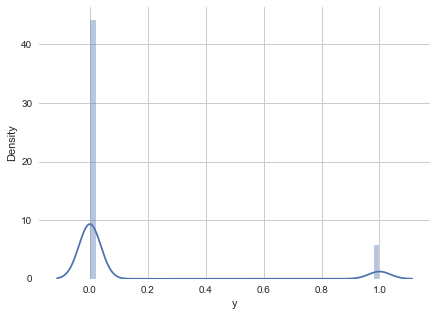

In [122]:
import seaborn as sns
sns.set_style('whitegrid') 
sns.distplot(df1['y']) 
plt.show()

<H1>Loan Application Data</H1>


In [36]:
# Importing data in dataframe
import pandas as pd
df_Loan = pd.read_csv('Loan_application_data.csv')
df_Loan.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
df_Loan.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [38]:
# Identifying columns with NUll and Nan data
df_Loan[df_Loan.columns[df_Loan.isnull().any()]]

,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,24700.5,351000.0,Unaccompanied,NaN,Laborers,1.0,0.083037,0.262949,0.139376,0.0247,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,35698.5,1129500.0,Family,NaN,Core staff,2.0,0.311267,0.622246,NaN,0.0959,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6750.0,135000.0,Unaccompanied,26.0,Laborers,1.0,NaN,0.555912,0.729567,NaN,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29686.5,297000.0,Unaccompanied,NaN,Laborers,2.0,NaN,0.650442,NaN,NaN,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,21865.5,513000.0,Unaccompanied,NaN,Core staff,1.0,NaN,0.322738,NaN,NaN,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,27558.0,225000.0,Unaccompanied,NaN,Sales staff,1.0,0.145570,0.681632,NaN,0.2021,...,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,12001.5,225000.0,Unaccompanied,NaN,NaN,1.0,NaN,0.115992,NaN,0.0247,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,29979.0,585000.0,Unaccompanied,NaN,Managers,1.0,0.744026,0.535722,0.218859,0.1031,...,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,20205.0,319500.0,Unaccompanied,NaN,Laborers,2.0,NaN,0.514163,0.661024,0.0124,...,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


c:\users\aniruddha\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


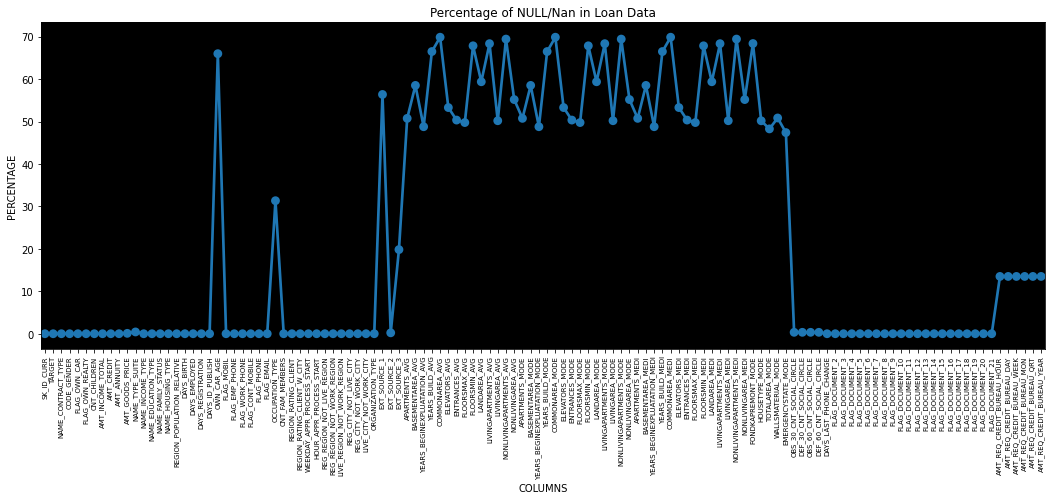

In [44]:
# Plotting Null data [ercentage]
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools
fig = plt.figure(figsize=(18,6))
null_df_Loan = pd.DataFrame((df_Loan.isnull().sum())*100/df_Loan.shape[0]).reset_index()
ax = sns.pointplot("index",0,data=null_df_Loan)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of NULL/Nan in Loan Data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")

In [39]:
# Dropping columns having more than 40% missing values
df_Loan=df_Loan.drop([ 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',"OWN_CAR_AGE","OCCUPATION_TYPE"],axis=1)

c:\users\aniruddha\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


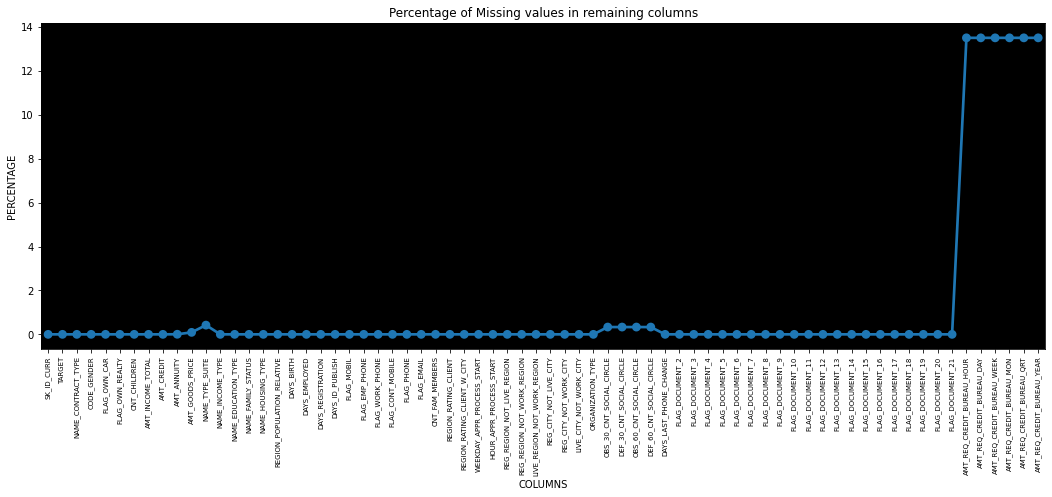

In [46]:
fig = plt.figure(figsize=(18,6))
null_df_Loan = pd.DataFrame((df_Loan.isnull().sum())*100/df_Loan.shape[0]).reset_index()
ax = sns.pointplot("index",0,data=null_df_Loan)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in remaining columns")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")

In [40]:
df_Loan[['AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_WEEK']].describe()

,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_WEEK
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.007000,0.267395,1.899974,0.265474,0.006402,0.034362
std,0.110757,0.916002,1.869295,0.794056,0.083849,0.204685
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
max,9.000000,27.000000,25.000000,261.000000,4.000000,8.000000


In [42]:
# Replacing nan values with median
import numpy as np
df_Loan[['AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT']] = df_Loan[['AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT']].replace(np.nan, 0)

In [43]:
df_Loan[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_WEEK']]=df_Loan[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_WEEK']].replace(np.nan, 0)

c:\users\aniruddha\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


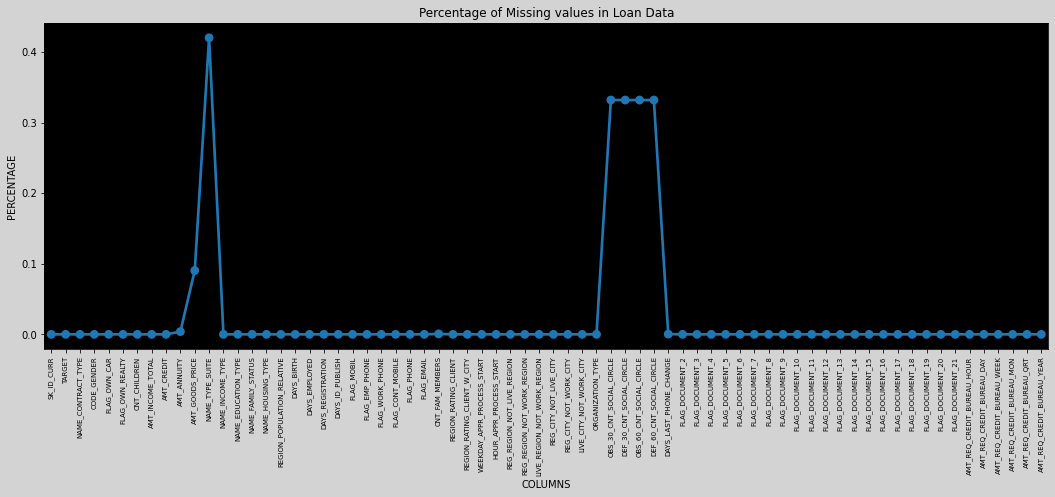

In [50]:
fig = plt.figure(figsize=(18,6))
null_df_Loan = pd.DataFrame((df_Loan.isnull().sum())*100/df_Loan.shape[0]).reset_index()
ax = sns.pointplot("index",0,data=null_df_Loan)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in Loan Data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")

In [44]:
df_Loan[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']].describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,306490.000000,306490.000000,306490.000000,306490.000000
mean,1.422245,0.143421,1.405292,0.100049
std,2.400989,0.446698,2.379803,0.362291
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,0.000000
max,348.000000,34.000000,344.000000,24.000000


In [45]:
# Replacing nan with Median
df_Loan[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']]=df_Loan[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']].replace(np.nan, 0)

In [46]:
df_Loan[['AMT_GOODS_PRICE','AMT_ANNUITY']].describe()

,AMT_GOODS_PRICE,AMT_ANNUITY
count,3.072330e+05,307499.000000
mean,5.383962e+05,27108.573909
std,3.694465e+05,14493.737315
min,4.050000e+04,1615.500000
25%,2.385000e+05,16524.000000
50%,4.500000e+05,24903.000000
75%,6.795000e+05,34596.000000
max,4.050000e+06,258025.500000


c:\users\aniruddha\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


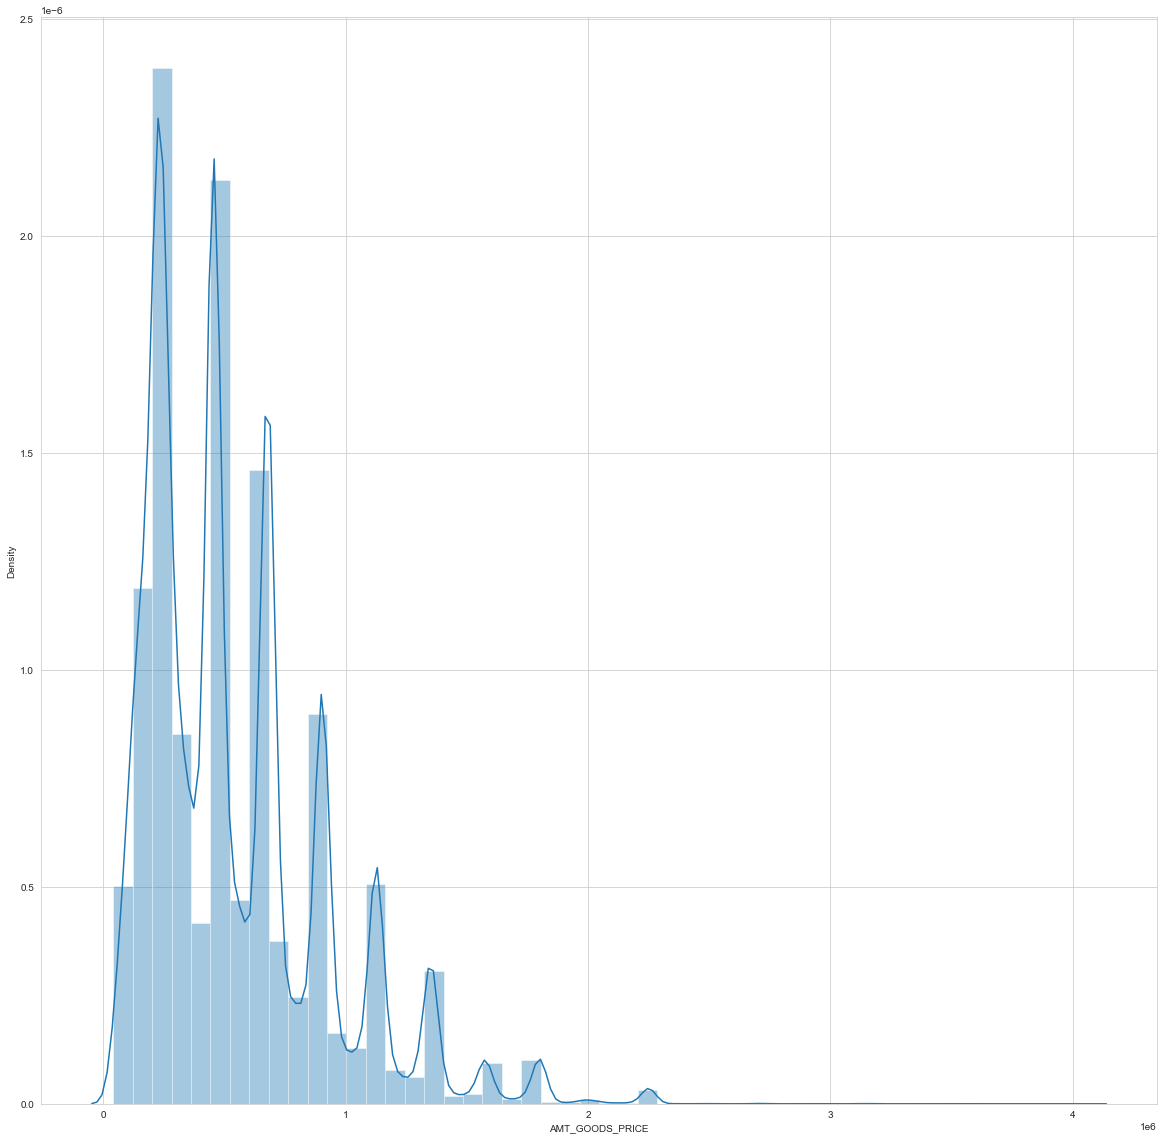

In [54]:
#identifying Skew in AMT_GOODS_PRICE
sns.set_style('whitegrid') 
sns.distplot(df_Loan['AMT_GOODS_PRICE']) 
plt.show()

c:\users\aniruddha\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


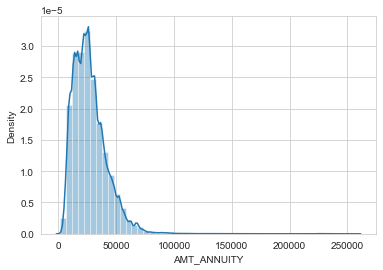

In [17]:
#identifying Skew in AMT_ANNUITY
sns.set_style('whitegrid') 
sns.distplot(df_Loan['AMT_ANNUITY']) 
plt.show()

In [18]:
#To reduce heavy right skew in AMT_GOODS_PRICE and AMT_ANNUITY replacing nan with median
df_Loan[['AMT_GOODS_PRICE','AMT_ANNUITY']]=df_Loan[['AMT_GOODS_PRICE','AMT_ANNUITY']].replace(np.nan, 0)

In [19]:
#replacing Nan with mode for string data
mode = df_Loan['NAME_TYPE_SUITE'].mode()
mode
df_Loan['NAME_TYPE_SUITE'] = df_Loan['NAME_TYPE_SUITE'].replace(np.nan, 'Unaccompanied')

In [20]:
df_Loan[df_Loan.columns[df_Loan.isnull().any()]]

,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE
0,1.0,-1134.0
1,2.0,-828.0
2,1.0,-815.0
3,2.0,-617.0
4,1.0,-1106.0
...,...,...
307506,1.0,-273.0
307507,1.0,0.0
307508,1.0,-1909.0
307509,2.0,-322.0


c:\users\aniruddha\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


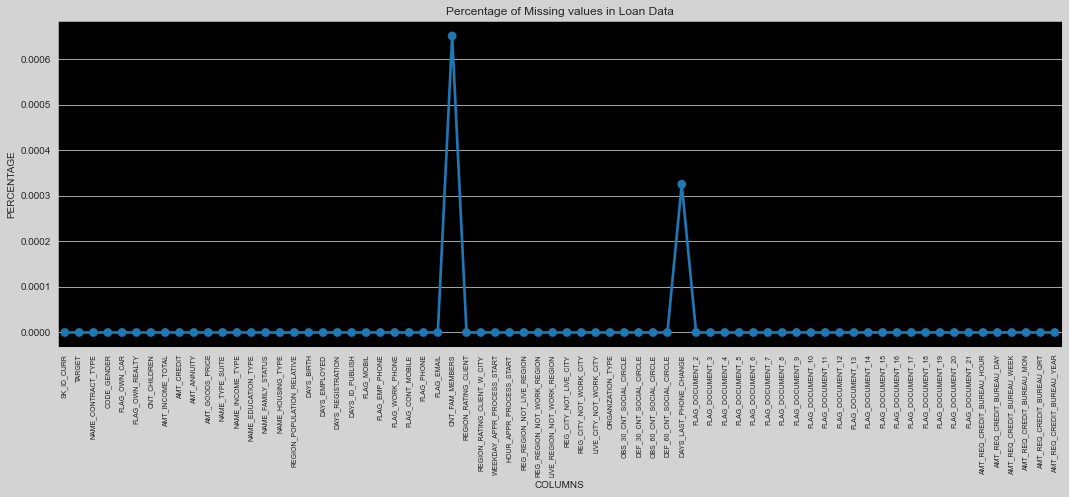

In [21]:
fig = plt.figure(figsize=(18,6))
null_df_Loan = pd.DataFrame((df_Loan.isnull().sum())*100/df_Loan.shape[0]).reset_index()
ax = sns.pointplot("index",0,data=null_df_Loan)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in Loan Data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")

In [22]:
df_Loan[['DAYS_LAST_PHONE_CHANGE','CNT_FAM_MEMBERS']].describe()

,DAYS_LAST_PHONE_CHANGE,CNT_FAM_MEMBERS
count,307510.000000,307509.000000
mean,-962.858788,2.152665
std,826.808487,0.910682
min,-4292.000000,1.000000
25%,-1570.000000,2.000000
50%,-757.000000,2.000000
75%,-274.000000,3.000000
max,0.000000,20.000000


In [23]:
#We can replace NA with 2(Median) for CNT_FAM_MEMBERS field, Mean can not be used as this field needs to be Whole number
df_Loan['CNT_FAM_MEMBERS']=df_Loan['CNT_FAM_MEMBERS'].replace(np.nan, 2)

In [24]:
df_Loan['DAYS_LAST_PHONE_CHANGE']=df_Loan['DAYS_LAST_PHONE_CHANGE'].replace(np.nan, 0)

c:\users\aniruddha\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


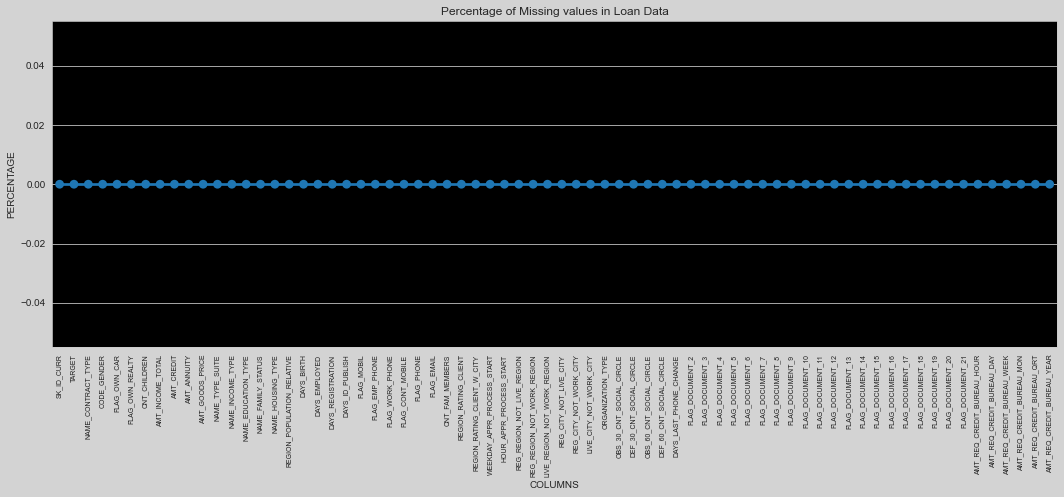

In [25]:
fig = plt.figure(figsize=(18,6))
null_df_Loan = pd.DataFrame((df_Loan.isnull().sum())*100/df_Loan.shape[0]).reset_index()
ax = sns.pointplot("index",0,data=null_df_Loan)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in Loan Data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")

<H5>Identifying correlation between fetures</H5>

In [26]:
# Identifying correlation between columns
corrmat = df_Loan.corr() 
corrmat

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000407,-0.000390,0.000849,-0.001500,0.001366,...,0.000509,0.000167,0.001073,0.000282,-0.002517,-0.002066,0.001879,0.000328,0.000809,0.003665
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012794,-0.039565,-0.037227,0.078239,-0.044932,...,-0.007952,-0.001358,0.000215,0.003709,-0.000074,0.001701,-0.001306,-0.014794,-0.005833,0.005522
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021414,-0.002008,-0.025573,0.330938,-0.239818,...,0.004031,0.000864,0.000988,-0.002450,0.000159,0.000107,-0.001083,-0.007983,-0.004913,-0.029618
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191639,0.159664,0.074796,0.027261,-0.064223,...,0.003130,0.002408,0.000242,-0.000589,0.001432,0.003481,0.003950,0.026746,0.007924,0.019922
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770080,0.986687,0.099738,-0.055436,-0.066838,...,0.034329,0.021082,0.031023,-0.016148,-0.002366,0.005028,0.001634,0.055536,0.020379,-0.026404
AMT_ANNUITY,-0.000407,-0.012794,0.021414,0.191639,0.770080,1.000000,0.775063,0.118345,0.009419,-0.104290,...,-0.009737,0.004574,0.011719,-0.017596,0.003893,0.002289,0.013416,0.037147,0.010682,-0.005801
AMT_GOODS_PRICE,-0.000390,-0.039565,-0.002008,0.159664,0.986687,0.775063,1.000000,0.103625,-0.053943,-0.064419,...,0.032836,0.020292,0.031639,-0.014825,-0.001714,0.005501,0.001966,0.057456,0.020876,-0.028479
REGION_POPULATION_RELATIVE,0.000849,-0.037227,-0.025573,0.074796,0.099738,0.118345,0.103625,1.000000,-0.029582,-0.003980,...,0.013367,0.002364,-0.000045,0.003437,-0.002216,0.001160,-0.002335,0.071630,-0.001873,-0.001137
DAYS_BIRTH,-0.001500,0.078239,0.330938,0.027261,-0.055436,0.009419,-0.053943,-0.029582,1.000000,-0.615864,...,0.044498,0.003614,0.009015,0.027282,0.003581,0.001018,-0.004014,-0.003580,-0.016281,-0.077783
DAYS_EMPLOYED,0.001366,-0.044932,-0.239818,-0.064223,-0.066838,-0.104290,-0.064419,-0.003980,-0.615864,1.000000,...,-0.040396,-0.010040,-0.010135,-0.008396,-0.004553,0.000309,0.002505,-0.032416,0.013466,0.041543


<H5>Data Visualization</H5>

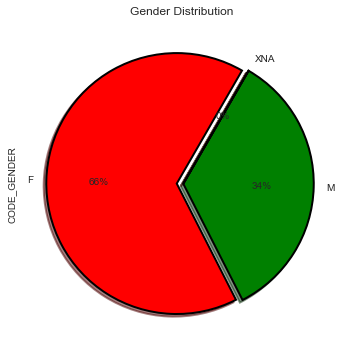

In [58]:
#Plotting Gender distribution
fig = plt.figure(figsize=(13,6))
plt.subplot(121)
df_Loan["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["red","green"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("Gender Distribution ")
plt.show()

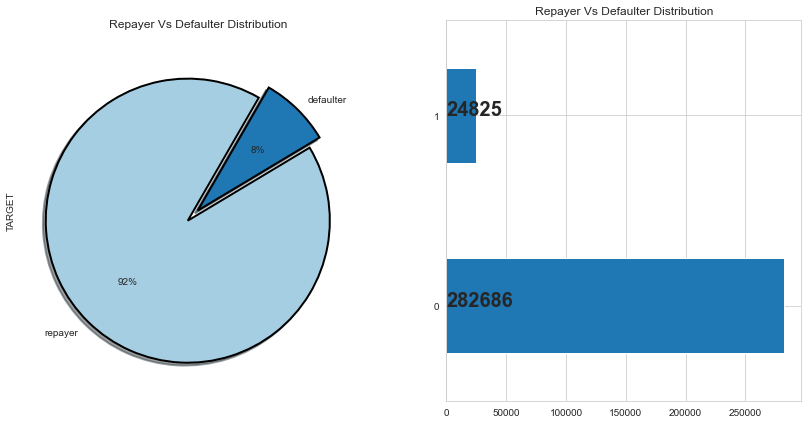

In [59]:
#plotting repayer against defaulter count
plt.figure(figsize=(14,7))
plt.subplot(121)
df_Loan["TARGET"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Paired",7),startangle = 60,labels=["repayer","defaulter"],                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Repayer Vs Defaulter Distribution")

plt.subplot(122)
ax = df_Loan["TARGET"].value_counts().plot(kind="barh")
for i,j in enumerate(df_Loan["TARGET"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Repayer Vs Defaulter Distribution")
plt.show()

c:\users\aniruddha\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


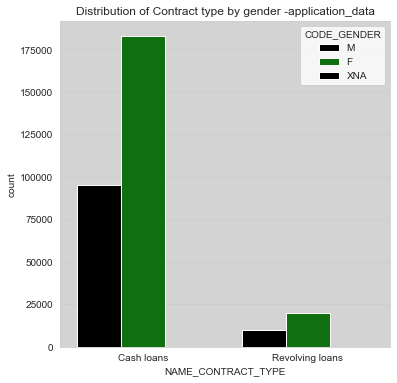

In [60]:
#plotting application type grouped by gender
fig  = plt.figure(figsize=(13,6))
plt.subplot(121)
ax = sns.countplot("NAME_CONTRACT_TYPE",hue="CODE_GENDER",data=df_Loan,palette=["k","g"])
ax.set_facecolor("lightgrey")
ax.set_title("Distribution of Contract type by gender -application_data")


plt.show()

<h3>Implementing Model</h3>

In [27]:
df_Loan_Final = df_Loan.copy()

In [28]:
#Encoding Predictor variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_Loan_Final['NAME_CONTRACT_TYPE']= le.fit_transform(df_Loan_Final['NAME_CONTRACT_TYPE'])
df_Loan_Final['CODE_GENDER']= le.fit_transform(df_Loan_Final['CODE_GENDER'])
df_Loan_Final['FLAG_OWN_CAR']= le.fit_transform(df_Loan_Final['FLAG_OWN_CAR'])
df_Loan_Final['FLAG_OWN_REALTY']= le.fit_transform(df_Loan_Final['FLAG_OWN_REALTY'])
df_Loan_Final

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,1,0,0,0,157500.0,254700.0,27558.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307507,456252,0,0,0,0,1,0,72000.0,269550.0,12001.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307508,456253,0,0,0,0,1,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,0,0,0,1,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# Changing data types
df_Loan_Final[['SK_ID_CURR',
'TARGET',
'NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']] = df_Loan_Final[['SK_ID_CURR',
'TARGET',
'NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']].astype(int)

<H5>LogisticRegression </H5>

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

Consi_cols = [ 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
X = df_Loan_Final[Consi_cols] # Features
y = df_Loan_Final.TARGET # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

c:\users\aniruddha\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
y_pred = logreg.predict(X_test)

<H5>Logistic Regression Evaluation- Accuracy, AUC-ROC Curve against KNN</H5>

In [32]:
print('Accuracy of logistic Regression classifier: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic Regression classifier: 0.92


c:\users\aniruddha\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.611


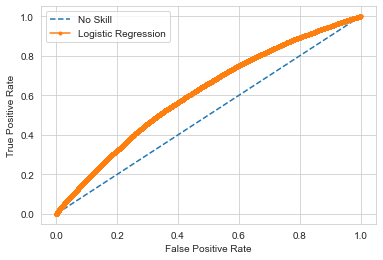

In [33]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset

Consi_cols = [ 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
X = df_Loan_Final[Consi_cols] # Features
y = df_Loan_Final.TARGET # Target variable


# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.7, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

<H5>KNeighbors</H5>

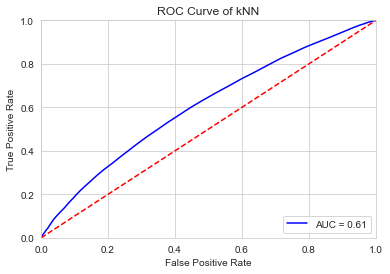

In [34]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

Consi_cols = [ 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
X = df_Loan_Final[Consi_cols] # Features
y = df_Loan_Final.TARGET # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

knn = KNeighborsClassifier(n_neighbors = 333)
knn.fit(X_train,y_train)

y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()